## Plot cancer type prediction results

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir, 'cancer_type').resolve()

In [3]:
# load raw data
results_df = au.load_cancer_type_prediction_results(results_dir, 'cancer_type')
print(results_df.shape)
results_df.head()

(1584, 9)


,auroc,aupr,cancer_type,training_data,signal,seed,data_type,fold,experiment
0,0.98013,0.69226,HNSC,methylation,signal,42,train,0,cancer_type
1,0.97116,0.56608,HNSC,methylation,signal,42,test,0,cancer_type
2,0.96767,0.49104,HNSC,methylation,signal,42,cv,0,cancer_type
3,0.97838,0.63986,HNSC,methylation,signal,42,train,1,cancer_type
4,0.98098,0.73787,HNSC,methylation,signal,42,test,1,cancer_type


In [4]:
expression_df = (
    results_df[results_df.training_data == 'expression']
        .drop(columns=['training_data'])
)
expression_results_df = au.compare_results(expression_df,
                                           identifier='cancer_type',
                                           metric='aupr',
                                           correction=True,
                                           correction_method='fdr_bh',
                                           correction_alpha=0.001,
                                           verbose=True)
expression_results_df.sort_values(by='p_value').head(n=10)

,identifier,delta_mean,p_value,corr_pval,reject_null
22,PRAD,0.944711,9.626824e-17,3.176852e-15,True
13,LAML,0.986546,2.033425e-16,3.355152e-15,True
32,UVM,0.989920,6.777477e-15,5.891536e-14,True
14,LGG,0.932015,7.141256e-15,5.891536e-14,True
15,LIHC,0.945071,1.465651e-14,9.673299e-14,True
2,BRCA,0.881080,6.896250e-13,3.792937e-12,True
28,THCA,0.944338,1.274508e-12,6.008394e-12,True
29,THYM,0.968364,1.639383e-12,6.762454e-12,True
21,PCPG,0.976095,5.497016e-12,2.015573e-11,True
27,TGCT,0.966830,6.944719e-12,2.291757e-11,True


In [5]:
methylation_df = (
    results_df[results_df.training_data == 'methylation']
        .drop(columns=['training_data'])
)
methylation_results_df = au.compare_results(methylation_df,
                                            identifier='cancer_type',
                                            metric='aupr',
                                            correction=True,
                                            correction_method='fdr_bh',
                                            correction_alpha=0.001,
                                            verbose=True)
methylation_results_df.sort_values(by='p_value').head(n=10)

,identifier,delta_mean,p_value,corr_pval,reject_null
13,LAML,0.984505,9.557738e-16,3.154054e-14,True
22,PRAD,0.942965,6.547947e-14,1.080411e-12,True
2,BRCA,0.877895,1.062526e-13,1.168778e-12,True
15,LIHC,0.936852,5.886485e-13,3.932420e-12,True
21,PCPG,0.962494,6.680993e-13,3.932420e-12,True
14,LGG,0.908997,7.149854e-13,3.932420e-12,True
27,TGCT,0.966988,1.710658e-12,8.064532e-12,True
28,THCA,0.943130,2.733145e-12,1.127422e-11,True
1,BLCA,0.763122,2.442780e-11,8.956859e-11,True
19,OV,0.928982,1.250898e-10,4.127965e-10,True


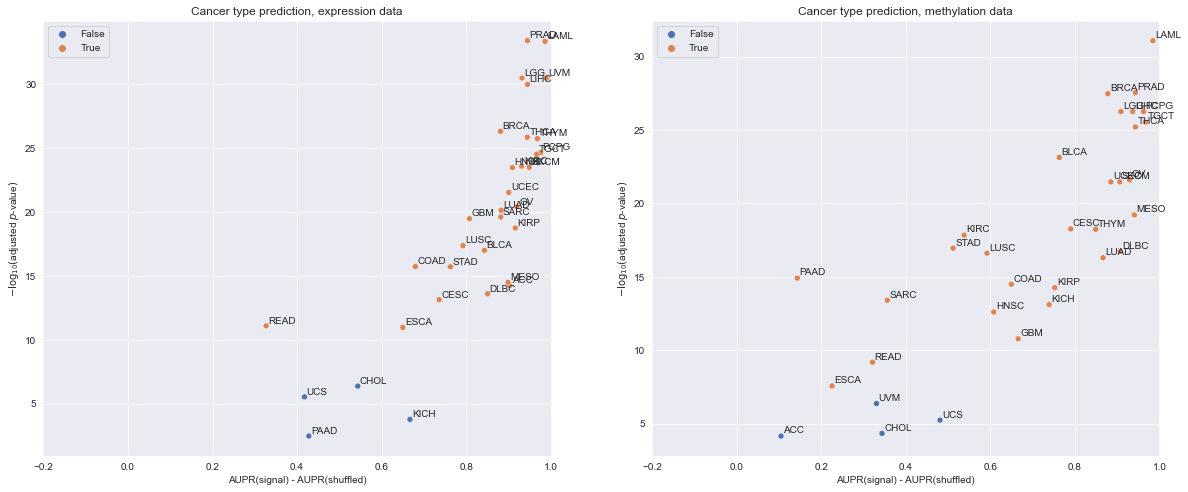

In [6]:
expression_results_df['nlog10_p'] = -np.log(expression_results_df.corr_pval)
methylation_results_df['nlog10_p'] = -np.log(methylation_results_df.corr_pval)

sns.set({'figure.figsize': (20, 8)})
fig, axarr = plt.subplots(1, 2)
sns.scatterplot(data=expression_results_df, x='delta_mean', y='nlog10_p', hue='reject_null', ax=axarr[0])
axarr[0].set_xlabel('AUPR(signal) - AUPR(shuffled)')
axarr[0].set_ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
axarr[0].set_xlim((-0.2, 1.0))
axarr[0].legend()
axarr[0].set_title(r'Cancer type prediction, expression data')
sns.scatterplot(data=methylation_results_df, x='delta_mean', y='nlog10_p', hue='reject_null', ax=axarr[1])
axarr[1].set_xlabel('AUPR(signal) - AUPR(shuffled)')
axarr[1].set_ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
axarr[1].set_xlim((-0.2, 1.0))
axarr[1].legend()
axarr[1].set_title(r'Cancer type prediction, methylation data')

def label_points(x, y, gene, sig, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'gene': gene, 'sig': sig})
    for i, point in a.iterrows():
        # if point['sig']:
        ax.text(point['x']+.005, point['y']+.2, str(point['gene']))

label_points(expression_results_df['delta_mean'], expression_results_df['nlog10_p'],
             expression_results_df.identifier, expression_results_df.reject_null, axarr[0])
label_points(methylation_results_df['delta_mean'], methylation_results_df['nlog10_p'],
             methylation_results_df.identifier, methylation_results_df.reject_null, axarr[1])

In [7]:
compare_results_df = au.compare_results(methylation_df,
                                        pancancer_df=expression_df,
                                        identifier='cancer_type',
                                        metric='aupr',
                                        correction=True,
                                        correction_method='fdr_bh',
                                        correction_alpha=0.001,
                                        verbose=True)
compare_results_df.head()

,identifier,delta_mean,p_value,corr_pval,reject_null
0,CESC,-0.053747,0.257045,0.403928,False
1,HNSC,0.305095,0.000159,0.000872,True
2,COAD,0.026638,0.478364,0.607155,False
3,BRCA,0.004285,0.198022,0.345609,False
4,LAML,0.002047,0.141625,0.292101,False


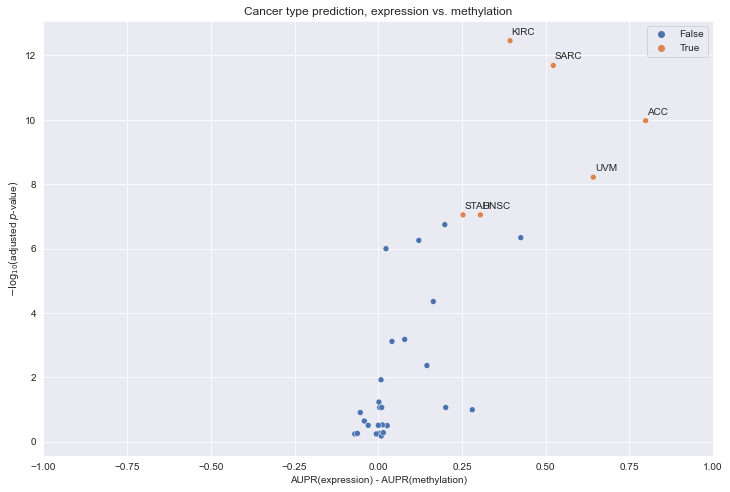

In [8]:
compare_results_df['nlog10_p'] = -np.log(compare_results_df.corr_pval)

sns.set({'figure.figsize': (12, 8)})
sns.scatterplot(data=compare_results_df, x='delta_mean', y='nlog10_p', hue='reject_null')
plt.xlabel('AUPR(expression) - AUPR(methylation)')
plt.ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
plt.xlim((-1.0, 1.0))
plt.legend()
plt.title(r'Cancer type prediction, expression vs. methylation')

def label_points(x, y, gene, sig, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'gene': gene, 'sig': sig})
    for i, point in a.iterrows():
        if point['sig']:
            ax.text(point['x']+.005, point['y']+.2, str(point['gene']))

label_points(compare_results_df['delta_mean'], compare_results_df['nlog10_p'],
             compare_results_df.identifier, compare_results_df.reject_null, plt.gca())